- [**I. Data & Package**](#dnp)
- [**II. Portfolio Selection: Volatility Decile Portfolio Strategy**](#ps)
    - WHAT?
    - HOW?
    - WHY?
- [**III.Trading Signal: Technical Indicator & Breakout**](#ts)
    - WHAT?
    - HOW?
    - WHY?
- [**IV.Strategy Performance Metrics: Sharpe Ratio, Culmulative Return, Maximum Drawdown**](#sp)
    - WHAT?
    - HOW?
    - WHY?

<a id='dnp'></a> 
### I.Data & Packages

In [1]:
# ----- Import necessary packages -----
import datetime
import yfinance as yf

import numpy as np #for data manipulation
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for chart
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# ----- Import data -----
# read SPY component companies from wiki 
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
tickers=table[0]['Symbol']
tickers=list(tickers)

# set up start and end date for data downloading
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2022, 12, 31)

# retreive data from yahoo finance 
SPY = yf.download(tickers, start=start, end=end)['Adj Close']
SPY.head()

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-10 00:00:00,44.753197,40.875896,136.746552,25.218826,48.492214,71.743164,36.391262,26.670000,109.291153,104.080002,...,78.563850,32.290073,64.477806,57.913666,49.036995,55.181698,93.081184,68.180000,31.538033,49.069756
2016-11-11 00:00:00,44.125156,41.484684,135.996307,25.368563,47.810291,71.139236,35.970089,27.040001,108.246643,103.680000,...,78.269119,32.423637,63.455643,57.098255,49.046288,54.605946,90.631203,66.879997,31.856873,48.608734
2016-11-14 00:00:00,43.135498,41.938862,134.008224,24.732191,47.711792,73.311630,35.127743,27.126667,106.493713,102.419998,...,77.836250,32.148155,63.166775,55.638077,49.501884,54.605946,90.594223,66.809998,33.186752,47.023979
2016-11-15 00:00:00,43.202114,43.253078,154.104767,25.059731,47.636032,71.689087,35.674381,27.033333,105.349319,103.660004,...,80.486053,32.765903,64.307442,56.861210,50.905861,54.605946,93.793083,75.459999,33.471722,47.206478
2016-11-16 00:00:00,43.944351,42.953506,152.838776,25.733545,46.628307,71.085159,35.799824,26.799999,106.557289,104.080002,...,80.208115,32.565556,63.514889,57.430103,50.533947,54.336071,93.266083,72.949997,32.349091,46.908726


In [3]:
# ----- Data Processing -----
# convert date to date time format
SPY.index = pd.to_datetime(SPY.index)
#type(SPY.index)

# caculate pct for each stock
SPY_pc = SPY[:'2019/12/31'].pct_change()
SPY_pc.tail()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-03,0.009246,-0.005807,0.005140,-0.010719,-0.015848,-0.047920,-0.008269,0.006856,-0.013995,0.012088,...,-0.093141,0.003954,0.002516,-0.003180,0.005962,0.007537,0.005097,-0.020932,0.006783,-0.023149
2016-11-04,0.015117,0.009142,-0.019157,-0.009014,0.002684,-0.025581,0.018500,-0.008351,0.002394,-0.009051,...,0.005826,-0.006401,-0.001076,0.017632,0.003387,-0.005653,0.004584,-0.017322,0.007058,0.020225
2016-11-07,0.031363,0.044037,0.009912,0.014425,0.051213,0.020718,0.019698,0.017232,0.023373,0.023164,...,-0.002044,0.019574,0.022496,0.008581,0.027834,0.036783,0.013979,0.027315,0.027398,0.000801
2016-11-08,-0.001969,0.005061,0.000945,0.005887,-0.001698,-0.040317,-0.000753,0.003949,-0.001334,-0.002485,...,-0.013544,0.008992,0.007202,-0.001964,0.015239,-0.000161,-0.025084,0.001855,0.004651,0.007003
2016-11-09,0.007014,0.017026,0.019322,-0.001621,0.065125,0.095321,0.006025,0.005075,-0.021701,-0.004890,...,0.013499,-0.046725,0.011018,0.003115,0.027586,-0.002097,-0.002062,0.036106,0.068518,0.013312


<a id='ps'></a> 
### II.Portfolio Selection: Volatility Decile Portfolio
    - What is it?
    - How it works?
    - Why use it?

In [4]:
# ----- calculate vol decile ----
# calculate annualized standard deviation
SPY_std = SPY_pc.std()*(252**0.5)*100
SPY_std

# pick up top decile stocks
SPY_vol_sort = SPY_std.sort_values(ascending = False)
top_decile = SPY_vol_sort[:int(len(SPY_vol_sort)*0.2)]

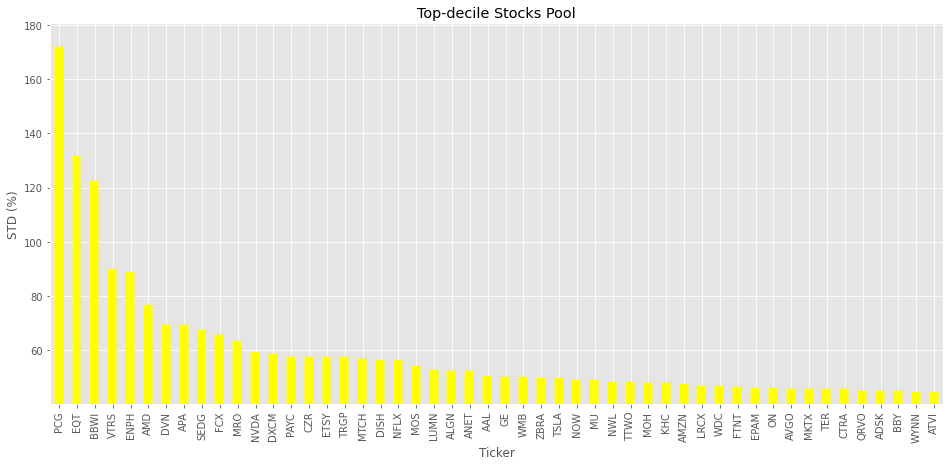

In [5]:
# ----- Visualization -----
top_decile.plot.bar(figsize = (16,7), color = 'yellow', ylim = top_decile.min()*0.9)
plt.title("Top-decile Stocks Pool")
plt.xlabel("Ticker")
plt.ylabel("STD (%)")
plt.show()

In [6]:
# ----- Portfolio construction -----
stock_pool = SPY.loc['2020-1':,top_decile.index]
stock_pool_pc = stock_pool.pct_change()
portfolio = pd.DataFrame()
portfolio['return'] = stock_pool_pc.mean(axis = 1)
portfolio['value'] = (portfolio['return'] + 1).cumprod()
portfolio.head()

/var/folders/h4/gx6fy86160sbkwvpp0lwtj380000gn/T/ipykernel_8004/3878800122.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  stock_pool = SPY.loc['2020-1':,top_decile.index]


,return,value
Date,,
2020-01-02,NaN,NaN
2020-01-03,-0.006498,0.993502
2020-01-06,0.004141,0.997615
2020-01-07,0.013016,1.010601
2020-01-08,0.000352,1.010957


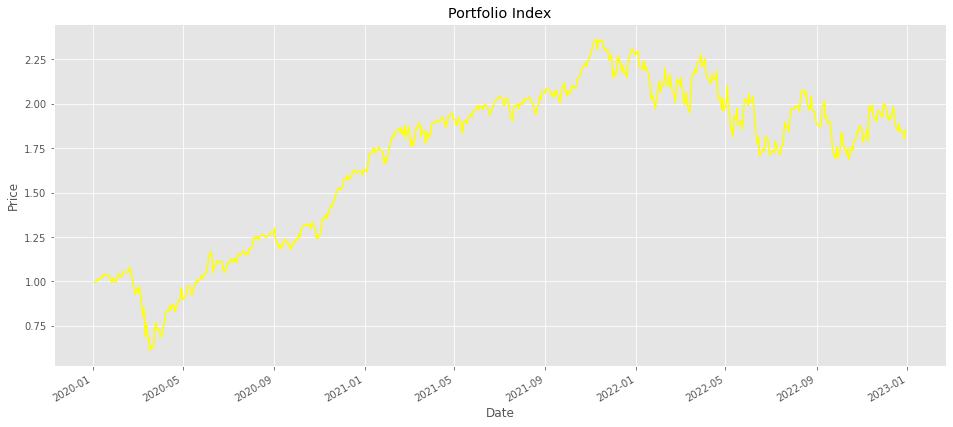

In [7]:
# ----- Visualization -----
portfolio.value.plot(color = 'yellow', figsize = (16, 7))
plt.title("Portfolio Index")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

<a id='ts'></a> 
### III. Trading Signal: Technical Indicator & Breakout
- **Moving Average (MA)**: Set the signal as 1 when the portfolio value is more than the simple moving average.
- **Breakout (BO)**: Create a trading signal which returns the value 1 when the current day's portfolio value is more than the maximum value.
- **Bollinger Band (BB)**: Set the signal as 1 when the price in between moving average and upper bound 

In [8]:
# ----- Determine trading signal -----
# Moving average
portfolio['sma_10'] = portfolio.value.rolling(60).mean()
portfolio['MA_signal'] = np.where(portfolio.value > portfolio.sma_10, 1, 0)

# Breakout
portfolio['high'] = portfolio.value.rolling(3).max()
portfolio['BO_signal'] = np.where(portfolio.value >= portfolio.high, 1, 0)

# Bolliger band
portfolio['sma_20'] = portfolio.value.rolling(20).mean()
portfolio['std_20'] = portfolio.value.rolling(20).std()
portfolio['BB_upper'] = portfolio['sma_20'] + 2* portfolio['std_20']
portfolio['BB_signal'] = np.where((portfolio.value > portfolio.sma_20) & (portfolio.value <= portfolio.BB_upper), 1, 0)

In [9]:
# ----- Visualization -----
def plot_signal(portfolio, signal_name, signals):
    portfolio['value'].plot(color='yellow')    
    plt.title(signal_name)
    plt.fill_between(portfolio.index, portfolio.value, where=(signals ==1), facecolor='y', alpha=0.2)      
    plt.ylabel('Portfolio Value',color='grey')
    
    # Plot signal values    
    signals.plot(secondary_y=True, figsize=(16,7), color='grey')
    plt.ylabel('Signal',color='grey')
    plt.show()

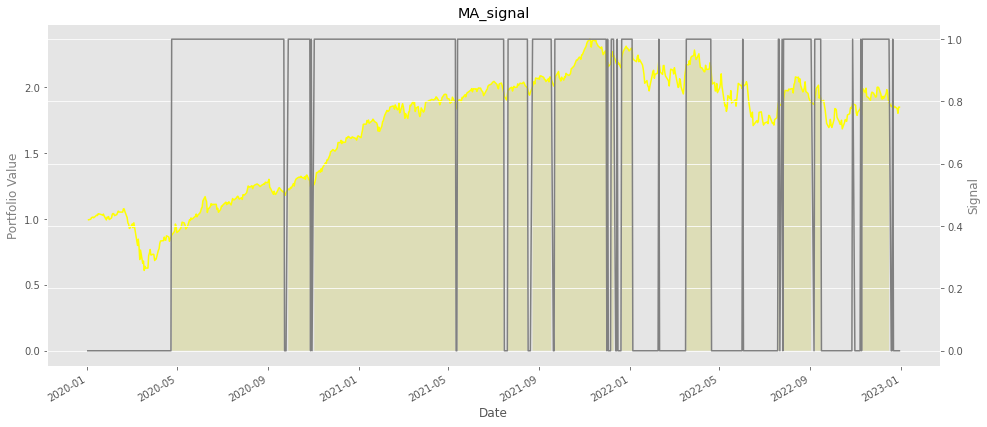

In [10]:
plot_signal(portfolio, 'MA_signal', portfolio.MA_signal)

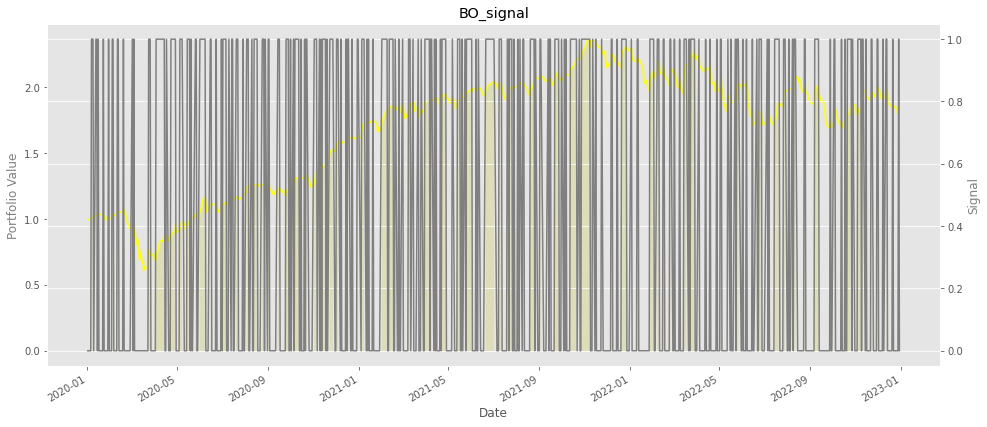

In [11]:
plot_signal(portfolio, 'BO_signal', portfolio.BO_signal)

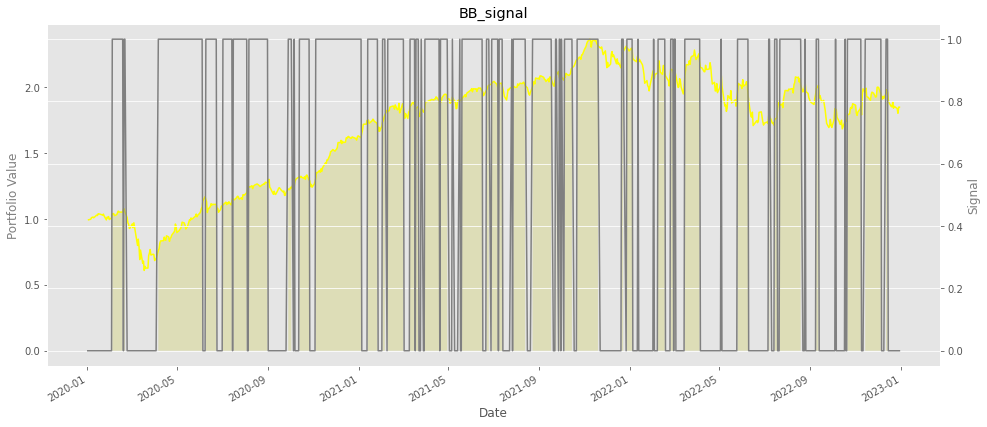

In [12]:
plot_signal(portfolio, 'BB_signal', portfolio.BB_signal)

<a id='sp'></a> 
### IV. Strategy Performance Metrics

In [13]:
def performance_metrics(portfolio, signal_name, signals):
    str_returns = portfolio['return'].shift(-1) * signals
    
    # ----- Sharpe ratio -----
    sharpe_ratio = np.mean(str_returns)/np.std(str_returns)*(252**0.5)

    # ----- Cumulative strategy returns -----
    portfolio['cum_str_returns'] = (str_returns+1).cumprod()        

    # ----- Drawdown -----  
    # Calculate the running maximum
    running_max = np.maximum.accumulate(portfolio['cum_str_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (portfolio['cum_str_returns'])/running_max - 1
    max_dd = drawdown.min()*100
    
    # ----- Output Info ------
    print("Strategy Name: ", signal_name)
    print('The Sharpe ratio is %.2f ' % sharpe_ratio)
    print("The cumulative returns is %2f" % portfolio['cum_str_returns'][-2])
    print('The maximum drawdown is %.2f %%' % max_dd)
    # Plot cumulative strategy returns
    portfolio['cum_str_returns'].plot(figsize=(16,7), color='yellow')
    plt.title('Strategy Returns', fontsize=14)
    plt.ylabel('Cumulative returns')
    plt.show()
    # Plot drawdowns
    drawdown.plot(color='yellow',figsize=(16,10))
    plt.title("Maximum Drawdown")
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='yellow', alpha = 0.4)
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()

Strategy Name:  MA_signal
The Sharpe ratio is 0.79 
The cumulative returns is 1.508027
The maximum drawdown is -34.00 %


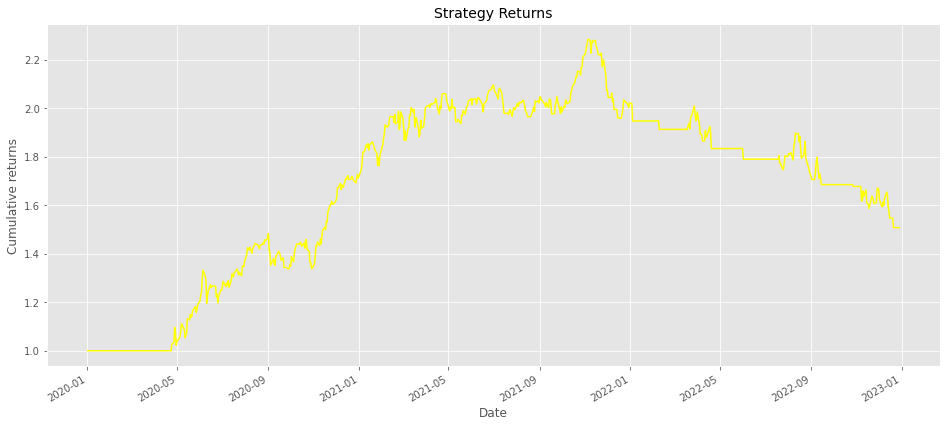

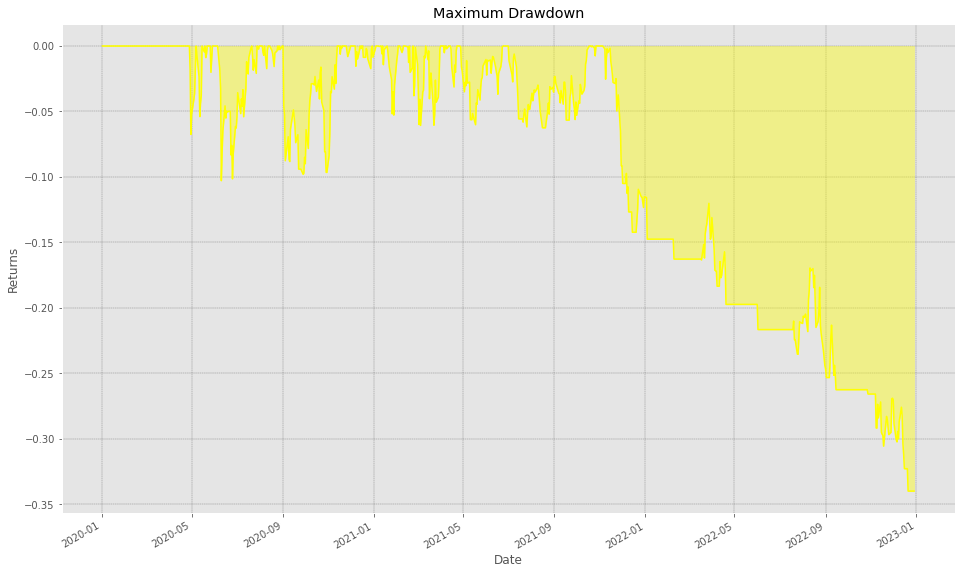

In [14]:
performance_metrics(portfolio, "MA_signal", portfolio.MA_signal)

Strategy Name:  BO_signal
The Sharpe ratio is 0.67 
The cumulative returns is 1.389775
The maximum drawdown is -24.74 %


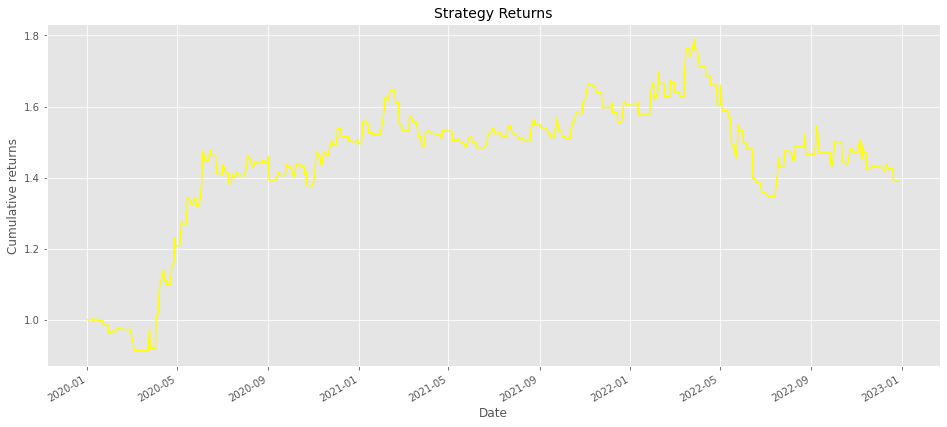

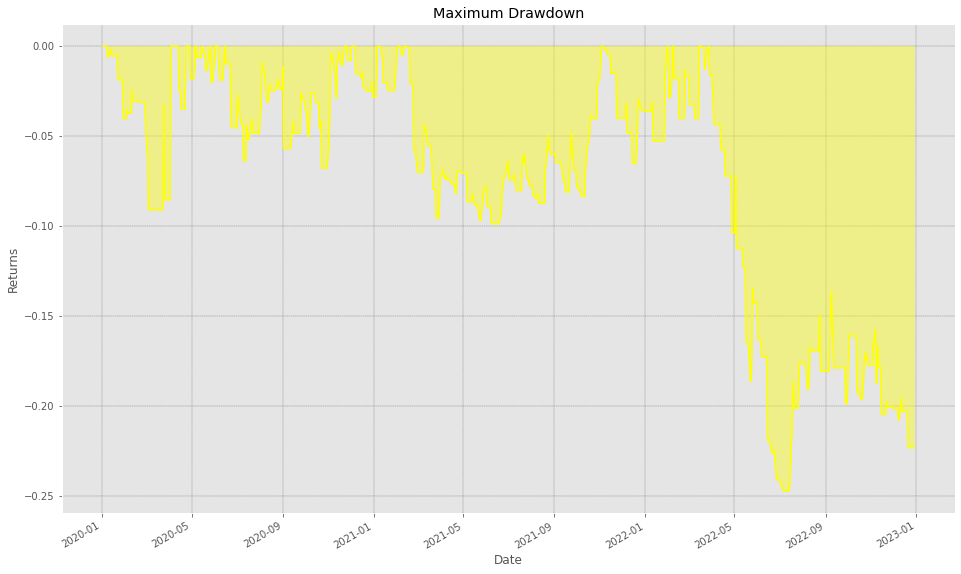

In [15]:
performance_metrics(portfolio, "BO_signal", portfolio.BO_signal)

Strategy Name:  BB_signal
The Sharpe ratio is 0.95 
The cumulative returns is 1.653324
The maximum drawdown is -23.21 %


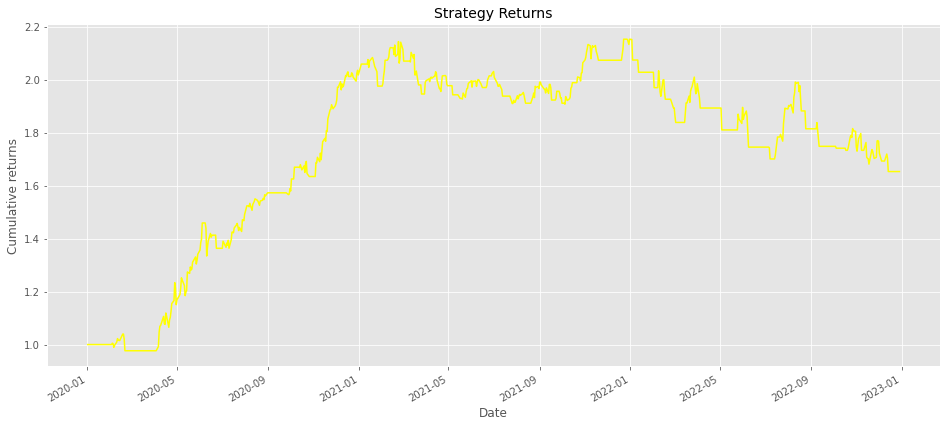

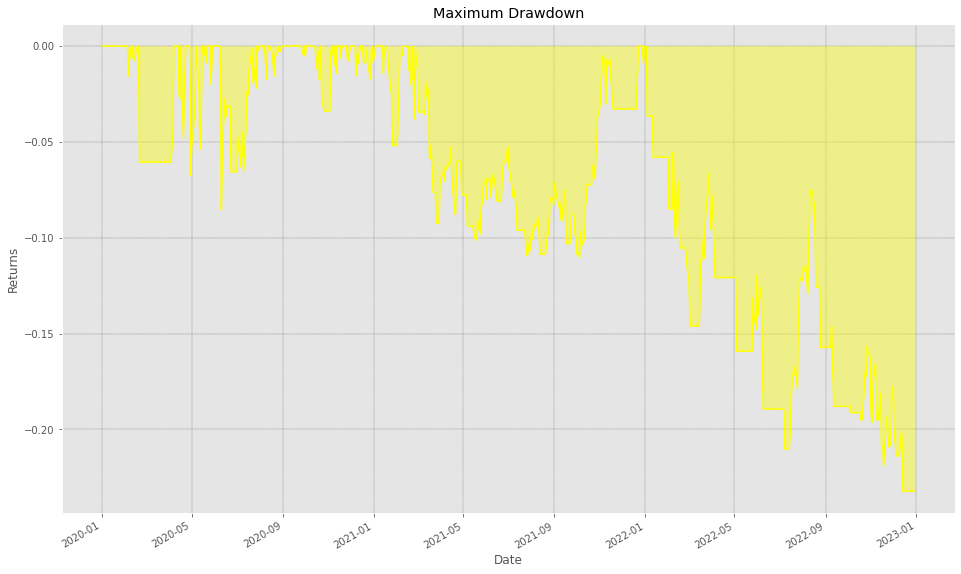

In [16]:
performance_metrics(portfolio, "BB_signal", portfolio.BB_signal)

Strategy Name:  MA_signal + BO_signal
The Sharpe ratio is 0.37 
The cumulative returns is 1.129826
The maximum drawdown is -21.17 %


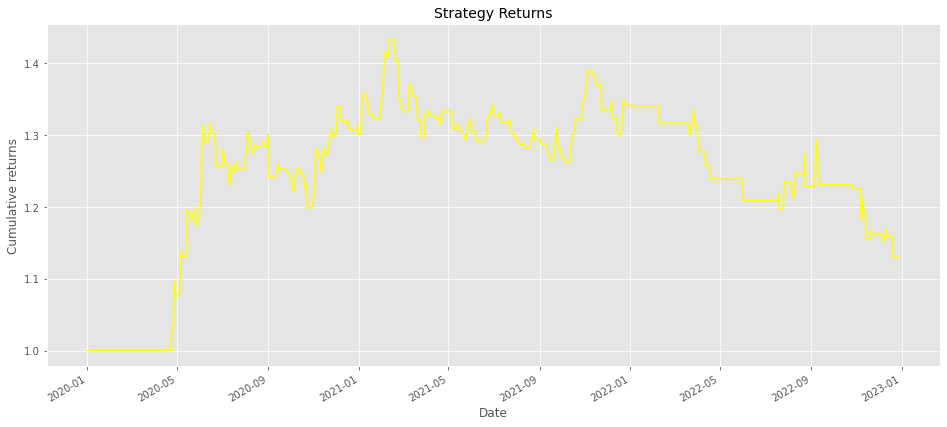

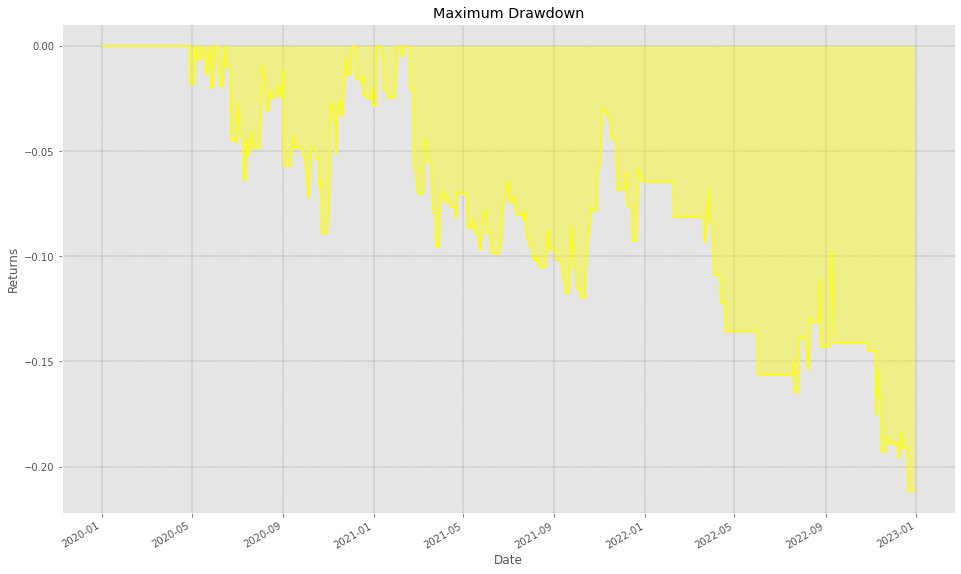

In [17]:
performance_metrics(portfolio, "MA_signal + BO_signal", portfolio.MA_signal & portfolio.BO_signal)

Strategy Name:  MA_signal + BB_signal
The Sharpe ratio is 0.86 
The cumulative returns is 1.655933
The maximum drawdown is -35.61 %


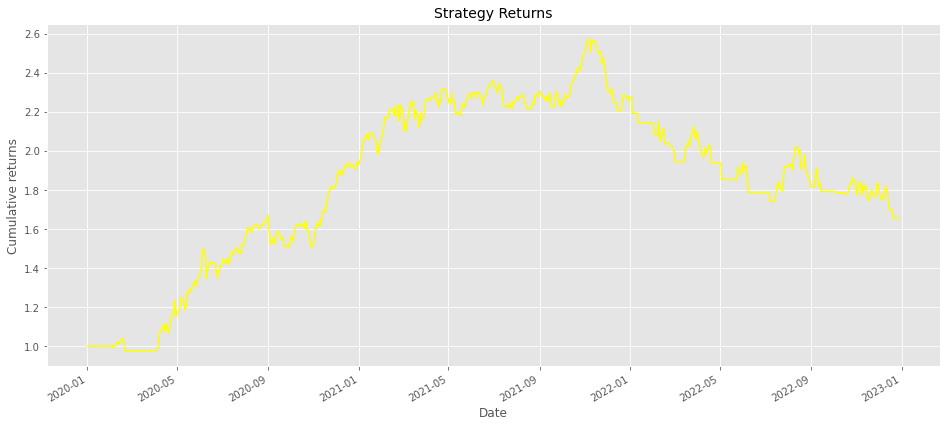

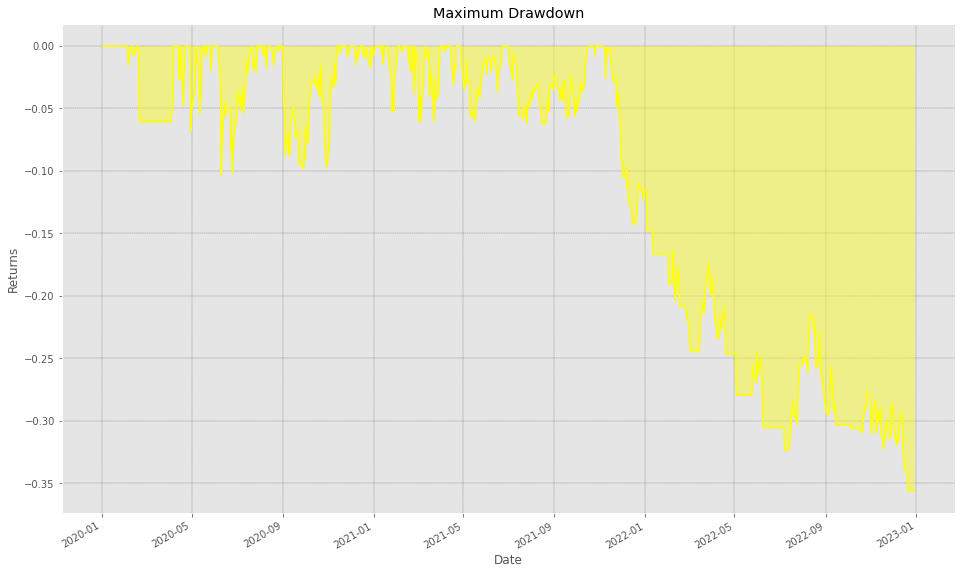

In [18]:
performance_metrics(portfolio, "MA_signal + BB_signal", portfolio.MA_signal | portfolio.BB_signal)

Strategy Name:  MA_signal + BO_signal + BB_signal
The Sharpe ratio is 1.05 
The cumulative returns is 1.792778
The maximum drawdown is -27.07 %


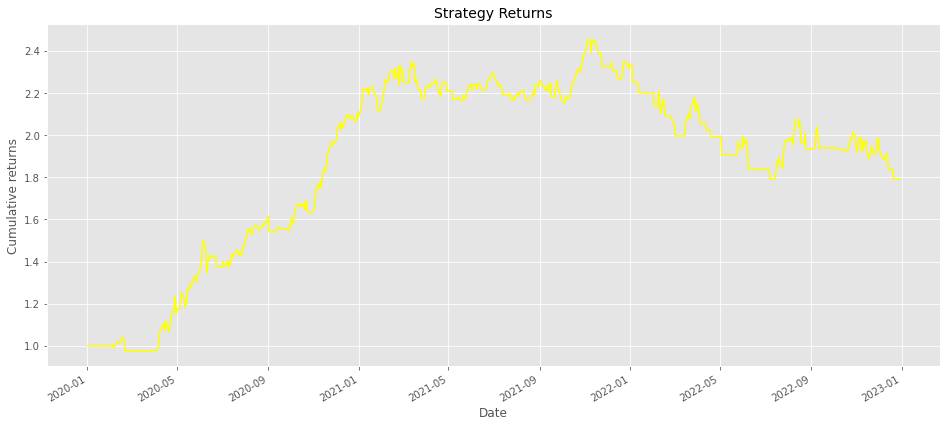

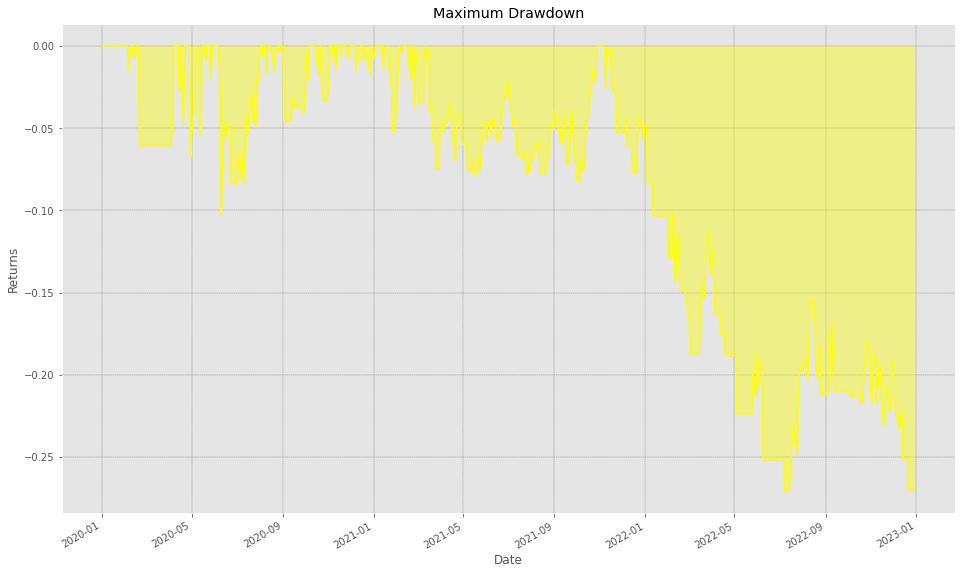

In [19]:
performance_metrics(portfolio, "MA_signal + BO_signal + BB_signal", (portfolio.MA_signal & portfolio.BO_signal) | portfolio.BB_signal)